<a href="https://www.kaggle.com/code/nishkoder/eda-model-evaluation-rain-in-australia?scriptVersionId=162788339" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Project Key Points
### 1. [EDA](#1)
### 2. [Cleaning](#2)
### 3. [Feature Engineering](#3)
### 4. [Model Training](#4)
### 5. [Model Evaluation](#5)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


### EDA<a id="1"/>

Workflow

* Load the weather data and look at the first few rows to identify the type of data and features.
    * Check the shape and information of the dataframe.
    * Read and inspect features (columns) and the target variable from the sample rows.
* Identify the numerical and categorical attributes from the data type of each column.
* Check out the summary statistics of the dataset, such as min/max, mean, and standard deviation. Then check all the numerical and categorical attributes, respectively.
    * Check the pair plot of a few columns to understand their relationships with each other.
* Once you’re confident that you understand all the features, numerical values, and categories in each of the features, save the dataframe for the next part.

In [2]:
import pandas as pd
import numpy as np
 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Load the dataset into a dataframe.
df = pd.read_csv(data_path)

In [3]:
df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

## Preview the dataset.
df.head()

In [4]:
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


There are a lot of variables/features here but the most interesting feature is the last column `RainTomorrow`. This is the target variable for our ML model which we want to predict.

It has 2 values:
* Yes - It will rain tomorrow.
* No - It will not rain tomorrow.


## Check the dimensions of the dataset.
df.shape

In [5]:
df.shape

(145460, 23)

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Check data information.
df.info()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Interpretting Data Information**
* We have 145460 rows, any column that contains lesser number of rows has missing values.
* We have 22 columns.
* There are categorical features that have data type `float64`.
* There are numerical features that have data type `object`.

In [8]:
## Summary statistics of numerical column:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [9]:
##Summary statistics of categorical columns:
df.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2017-06-18,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [10]:
##Pairplot:
# import seaborn as sns
# sns.pairplot(df)

Workflow

Use the dataframe from the last milestone to find out whether the target variable (“Rain_Tomorrow”) is categorical or numerical.
Check out the data type of the target variable to figure out which methods should be used to perform univariate analysis.
You can use the .info() report from Milestone 1.
Find out the number of missing values in the target variable.
Analyze the labels in the target variable:
Find out the number of unique labels.
Get the frequency distribution of values.
Evaluate the percentage of the frequency distribution for each label.
Visualize the distribution using the seaborn countplot.
Convert yes/no labels to integers 1/0 to make calculations easier.
Check out the cardinality of each categorical variable:
Extract day, month, and year from the date column.
Drop the original date column.
Evaluate the feature importance for shortlisted variables:
Find out the correlation coefficient of all the numerical variables with respect to every other feature.
Visualize the correlation by plotting the data on a heatmap.
Document your findings in markdown.

In [11]:
##summary statistics for categorical columns
df.describe(include=['object'])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2017-06-18,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


## Univariate Analysis

### exploring the target variable

In [12]:
##checking for missing values
df['RainTomorrow'].isnull().sum()

3267

In [13]:
##number of unique values
df['RainTomorrow'].nunique()

2

In [14]:
##frequency distribution of labels
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [15]:
##ratio of freq distribution of values
df['RainTomorrow'].value_counts() / len(df)

RainTomorrow
No     0.758394
Yes    0.219146
Name: count, dtype: float64

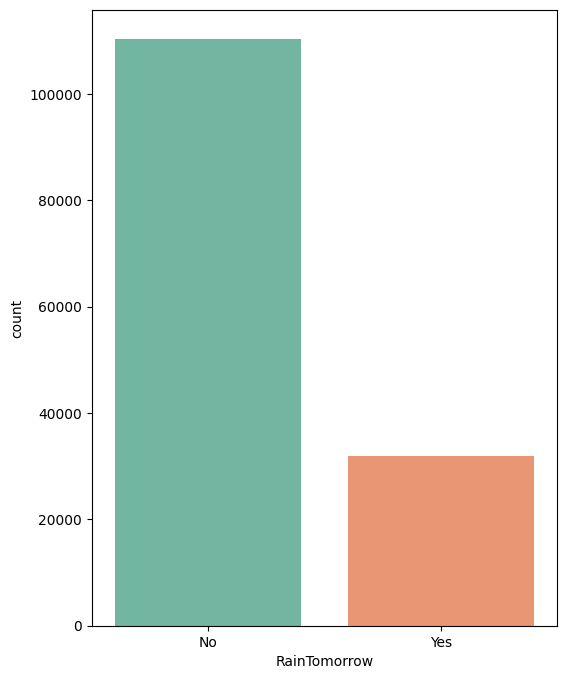

In [16]:
##visualizing the frequency distribution
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set2")
plt.show()

### Takeaways from Univariate Analysis

1. We have 2 categories of values, `yes` and `No`.
2. We have far more negative(No) values than psitive(Yes) values.
3. `No` appears 77.5% of time, `Yes` appears 22.4% of time.

In [17]:
## Convert Yes/No labels to integers 1/0 to make
df.RainTomorrow = (df.RainTomorrow == 'Yes').astype(int)
df.RainTomorrow

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int64

## Birvariate Analysis

Bivariate Analysis requires you to learn about relationships between pairs of variables.

First, segregating the categorical from the dataframe.

In [18]:
cat_vars = ['object']
cat_df = df.select_dtypes(include=cat_vars)
cat_df.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,2008-12-01,Albury,W,W,WNW,No
1,2008-12-02,Albury,WNW,NNW,WSW,No
2,2008-12-03,Albury,WSW,W,WSW,No
3,2008-12-04,Albury,NE,SE,E,No
4,2008-12-05,Albury,W,ENE,NW,No


We have 7 categorical columns out of which:
* We have a Date column
* We have 6 categorical variables.
* `RainToday` and `RainTomorrow` are binary categorical features.
    

In [19]:
##counting the missing values in categorical features
cat_df.isnull().sum()

Date               0
Location           0
WindGustDir    10326
WindDir9am     10566
WindDir3pm      4228
RainToday       3261
dtype: int64

In [20]:
for var in list(cat_df.columns):
    print(var, 'has', len(cat_df[var].unique()), 'labels')

Date has 3436 labels
Location has 49 labels
WindGustDir has 17 labels
WindDir9am has 17 labels
WindDir3pm has 17 labels
RainToday has 3 labels


In [21]:
##formatting Date column to DateTime data type
df['Date'] = pd.to_datetime(df['Date'])

##checking datat info again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [22]:
##extracting year from date
df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int32

In [23]:
##extracting month from date
df['Month'] = df['Date'].dt.month
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int32

In [24]:
##extracting day from date
df['Day'] = df['Date'].dt.day
df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int32

In [25]:
##dropping the original date column
df.drop(['Date'], axis=1, inplace=True)

In [26]:
##checking data head
df.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,0,2008,12,5


## Plotting correlation matrix

In [27]:
# df1 = pd.drop(df, columns=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday'])
df1 = df.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday'], axis=1)


In [28]:
##creating correlation matrix
corr = df1.corr()

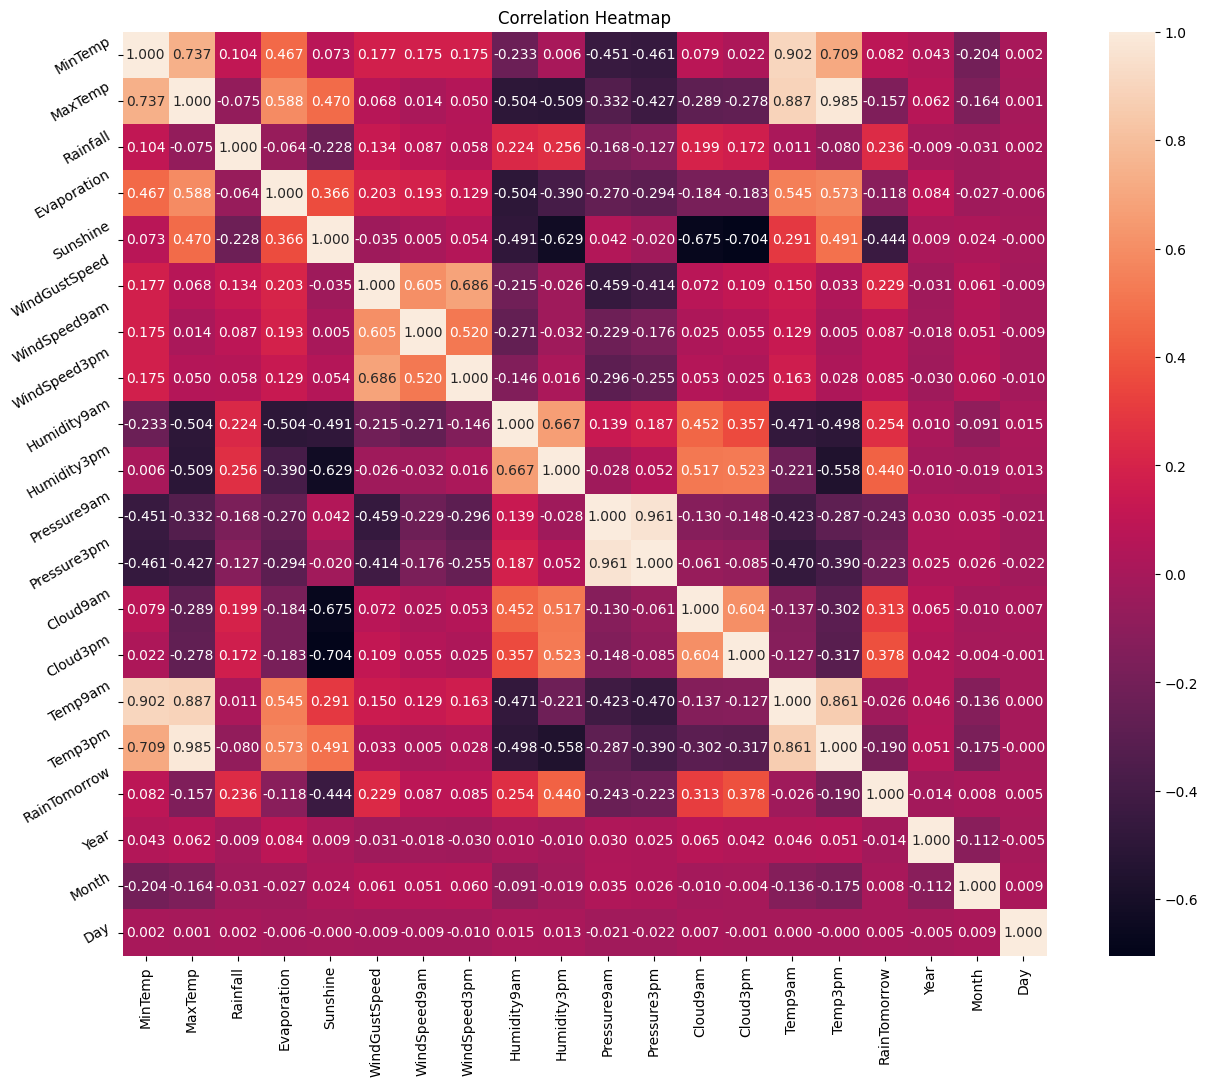

In [29]:
##plotting the correlation matrix
plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, 
                 annot=True,
                 square=True,
                 fmt='.3f',
                 linecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.title('Correlation Heatmap')
plt.show()

### Data Cleaning <a id="2"/>

In [30]:
def print_multiple_value(values: list):
    for index, value in enumerate(values):
        print(f"================================================{index + 1}================================================")
        print("\n".join([
            str(value),
            ""
        ]))
        

In [31]:
cat_df = df.select_dtypes(include=cat_vars)
print_multiple_value([cat_df.columns, cat_df.head()])

================================================1================================================
Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

================================================2================================================
  Location WindGustDir WindDir9am WindDir3pm RainToday
0   Albury           W          W        WNW        No
1   Albury         WNW        NNW        WSW        No
2   Albury         WSW          W        WSW        No
3   Albury          NE         SE          E        No
4   Albury           W        ENE         NW        No



In [32]:
##printing missing value and labels in each column
print(cat_df.isnull().sum(), "=====================")
for var in list(cat_df.columns):
    print(var, 'has', len(cat_df[var].unique()), 'labels')

Location           0
WindGustDir    10326
WindDir9am     10566
WindDir3pm      4228
RainToday       3261
dtype: int64 =====================
Location has 49 labels
WindGustDir has 17 labels
WindDir9am has 17 labels
WindDir3pm has 17 labels
RainToday has 3 labels


In [33]:
##isolating numerical columns in a dataframe
numerics = ['int64', 'float64']
num_df = df.select_dtypes(include=numerics)
print_multiple_value([num_df.head().T, num_df.isnull().sum()])


================================================1================================================
                    0       1       2       3       4
MinTemp          13.4     7.4    12.9     9.2    17.5
MaxTemp          22.9    25.1    25.7    28.0    32.3
Rainfall          0.6     0.0     0.0     0.0     1.0
Evaporation       NaN     NaN     NaN     NaN     NaN
Sunshine          NaN     NaN     NaN     NaN     NaN
WindGustSpeed    44.0    44.0    46.0    24.0    41.0
WindSpeed9am     20.0     4.0    19.0    11.0     7.0
WindSpeed3pm     24.0    22.0    26.0     9.0    20.0
Humidity9am      71.0    44.0    38.0    45.0    82.0
Humidity3pm      22.0    25.0    30.0    16.0    33.0
Pressure9am    1007.7  1010.6  1007.6  1017.6  1010.8
Pressure3pm    1007.1  1007.8  1008.7  1012.8  1006.0
Cloud9am          8.0     NaN     NaN     NaN     7.0
Cloud3pm          NaN     NaN     2.0     NaN     8.0
Temp9am          16.9    17.2    21.0    18.1    17.8
Temp3pm          21.8    24.3    23.2 

#### 16 numerical columns have missing values

### Outlier Analysis

In [34]:
##summary statistics of all the columns
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


If we compare the mean of each column with the min/max value, we'll notice that `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` might have outliers as there's a considerable difference between average value and max value.

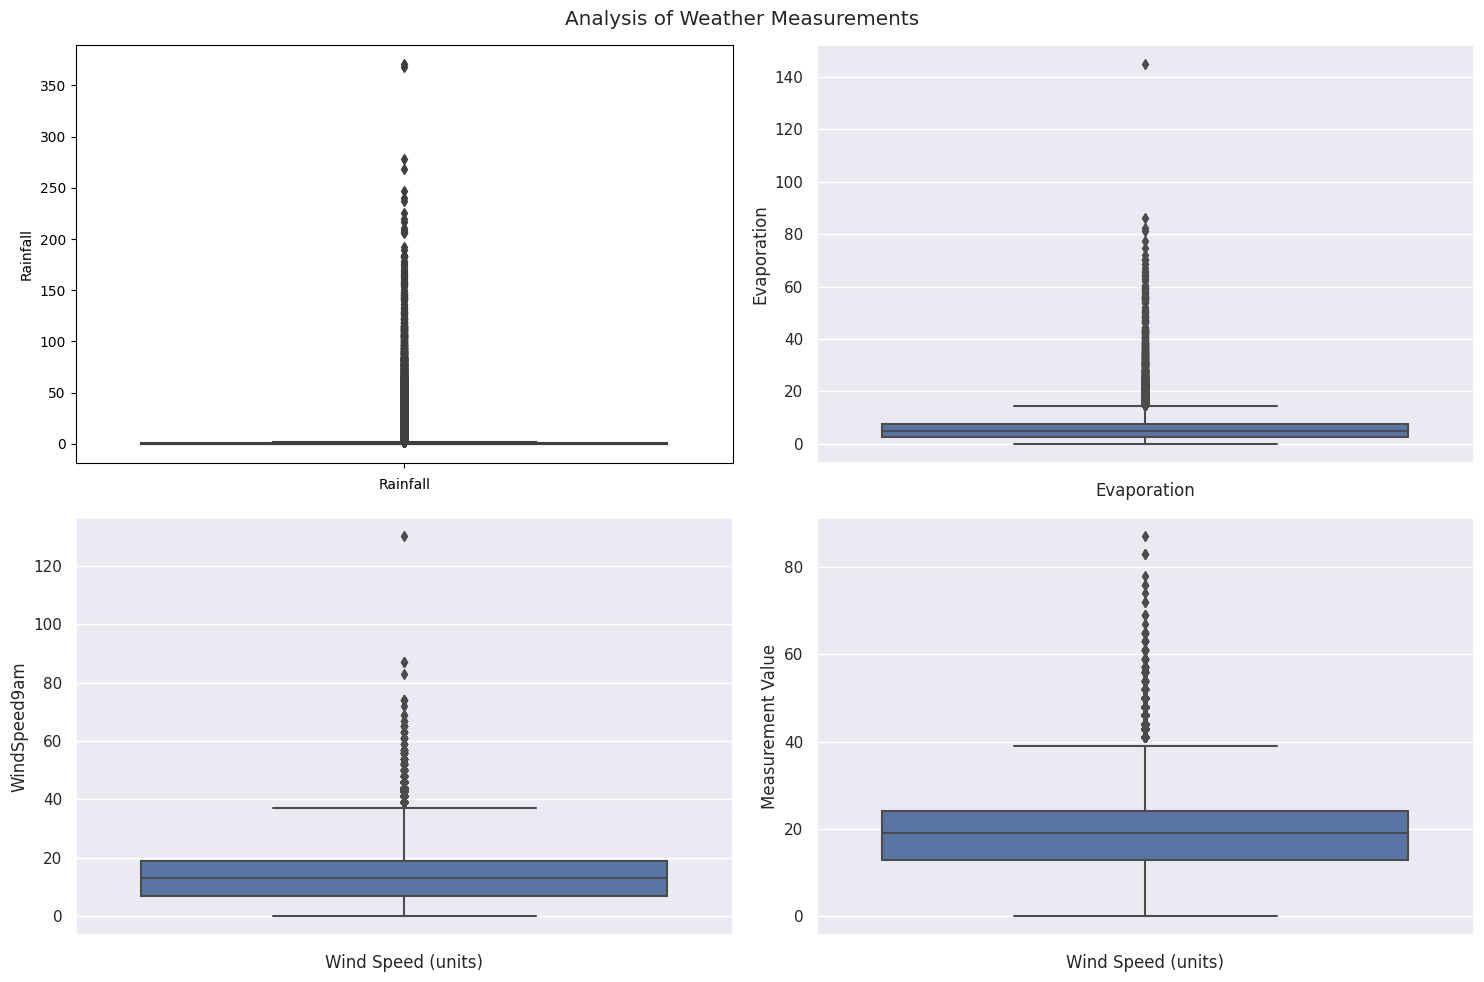

In [35]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
ax = sns.boxplot(y=df["Rainfall"])
ax.set_xlabel("Rainfall") 
sns.set(style="darkgrid")

plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df["Evaporation"])
ax.set_xlabel("Evaporation")  # Note: Removed since we'll add shared label
sns.set(style="darkgrid")

plt.subplot(2, 2, 3)
ax = sns.boxplot(y=df["WindSpeed9am"])
ax.set_xlabel("Wind Speed (units)")   # Shared x-axis label (units of measure)
sns.set(style="darkgrid")

plt.subplot(2, 2, 4)
ax = sns.boxplot(y=df["WindSpeed3pm"])
ax.set_xlabel("Wind Speed (units)")   # Shared x-axis label
sns.set(style="darkgrid")

plt.ylabel("Measurement Value")  # Shared y-axis label
plt.suptitle("Analysis of Weather Measurements")
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show() 

In [36]:
def calculate_outlier_bounds(df, column_name):
    """
    Calculates outlier bounds for a given column in a DataFrame using the IQR method.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column for which to calculate bounds.

    Returns:
        tuple: A tuple containing the lower and upper outlier bounds.
    """

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lf = Q1 - (3 * IQR)  # Using 3 * IQR is common practice
    uf = Q3 + (3 * IQR)

    return lf, uf

In [37]:
rainfall_lower, rainfall_upper = calculate_outlier_bounds(df, 'Rainfall')
print('Outliers for Rainfall are < {} or > {}'.format(rainfall_lower, rainfall_upper))

evaporation_lower, evaporation_upper = calculate_outlier_bounds(df, 'Evaporation')
print('Outliers for Evaporation are < {} or > {}'.format(evaporation_lower, evaporation_upper))

windSpeed9am_lower, windSpeed9am_upper = calculate_outlier_bounds(df, 'WindSpeed9am')
print('Outliers for WindSpeed9am are < {} or > {}'.format(windSpeed9am_lower, windSpeed9am_upper))

windSpeed3pm_lower, windSpeed3pm_upper = calculate_outlier_bounds(df, 'WindSpeed3pm')
print('Outliers for WindSpeed3pm are < {} or > {}'.format(windSpeed3pm_lower, windSpeed3pm_upper))


Outliers for Rainfall are < -2.4000000000000004 or > 3.2
Outliers for Evaporation are < -11.800000000000002 or > 21.800000000000004
Outliers for WindSpeed9am are < -29.0 or > 55.0
Outliers for WindSpeed3pm are < -20.0 or > 57.0


## Feature Engineering <a id="3"/>

In [38]:
## segregating the target variable
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow'].copy()
y.shape

(145460,)

In [39]:
##creating training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=10)
print(X_train.shape, y_train.shape)

(116368, 24) (116368,)


#### 1. Imputing Missing Values

There are different methods to impute missing values for categorical and numerical variables.

1. We'll look at imputing missing values in numerical features.
2. Then, we'll look at imputing missing values in categorical features.

In [40]:
##creating a list numerical and categorical columns
num_cols = list(X_train.select_dtypes(include=numerics).columns)
cat_cols = list(X_train.select_dtypes(include=cat_vars).columns)

##imputing missing numerical values in both training and testing data
for df in [X_train, X_test]:
    for col in num_cols:
        col_median=X_train[col].median() # usign median to impute
        df[col].fillna(col_median, inplace=True)

####imputing missing cat values in both training and testing data
for df in [X_train, X_test]:
    for col in cat_cols:
        col_mode=X_train[col].mode()[0]
        df[col].fillna(col_mode, inplace=True)  

##checking missing values
print_multiple_value([X_train.isnull().sum().T,X_test.isnull().sum().T])

================================================1================================================
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

================================================2================================================
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm   

We're going to remove outliers from `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns.


In [41]:
def cap_max_values(df, var, max_value):
    return np.where(df[var]>max_value, max_value, df[var])

##removing outliers from both training and testing set
for df in [X_train, X_test]:
    df['Rainfall'] = cap_max_values(df, "Rainfall", 3.2)
    df['Evaporation'] = cap_max_values(df, "Evaporation", 21.8)
    df['WindSpeed9am'] = cap_max_values(df, "WindSpeed9am", 55.0)
    df['WindSpeed3pm'] = cap_max_values(df, "WindSpeed3pm", 57.0)

X_train[['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']].describe().T


,count,mean,std,min,25%,50%,75%,max
Rainfall,116368.0,0.671203,1.182336,0.0,0.0,0.0,0.6,3.2
Evaporation,116368.0,5.143601,2.805871,0.0,4.2,4.8,5.2,21.8
WindSpeed9am,116368.0,14.024938,8.821662,0.0,7.0,13.0,19.0,55.0
WindSpeed3pm,116368.0,18.651760,8.678864,0.0,13.0,19.0,24.0,57.0


In [42]:
##converting dataframes into dictionaries
train_dict = X_train[cat_cols + num_cols].to_dict(orient='records')
test_dict = X_test[cat_cols + num_cols].to_dict(orient='records')

In [43]:
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
dv.fit(test_dict)
X_train = dv.transform(train_dict)
X_test = dv.transform(test_dict)

In [44]:
X_train[0]

array([5.0000e+00, 5.0000e+00, 6.0000e-01, 2.3000e+01, 4.5000e+01,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.3100e+01,
       8.5000e+00, 1.0078e+03, 1.0123e+03, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 9.0000e+00, 2.2600e+01, 1.7500e+01, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [45]:
##feature names of the encoded variables
print(len(dv.get_feature_names_out()))
cols = dv.get_feature_names_out()
print(cols)

115
['Cloud3pm' 'Cloud9am' 'Evaporation' 'Humidity3pm' 'Humidity9am'
 'Location=Adelaide' 'Location=Albany' 'Location=Albury'
 'Location=AliceSprings' 'Location=BadgerysCreek' 'Location=Ballarat'
 'Location=Bendigo' 'Location=Brisbane' 'Location=Cairns'
 'Location=Canberra' 'Location=Cobar' 'Location=CoffsHarbour'
 'Location=Dartmoor' 'Location=Darwin' 'Location=GoldCoast'
 'Location=Hobart' 'Location=Katherine' 'Location=Launceston'
 'Location=Melbourne' 'Location=MelbourneAirport' 'Location=Mildura'
 'Location=Moree' 'Location=MountGambier' 'Location=MountGinini'
 'Location=Newcastle' 'Location=Nhil' 'Location=NorahHead'
 'Location=NorfolkIsland' 'Location=Nuriootpa' 'Location=PearceRAAF'
 'Location=Penrith' 'Location=Perth' 'Location=PerthAirport'
 'Location=Portland' 'Location=Richmond' 'Location=Sale'
 'Location=SalmonGums' 'Location=Sydney' 'Location=SydneyAirport'
 'Location=Townsville' 'Location=Tuggeranong' 'Location=Uluru'
 'Location=WaggaWagga' 'Location=Walpole' 'Location=W

After one hot encoding we have 115 columns in our training and testing set

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Cloud3pm,116368.0,0.523318,0.234005,0.0,0.444444,0.555556,0.666667,1.0
Cloud9am,116368.0,0.517562,0.253521,0.0,0.333333,0.555556,0.666667,1.0
Evaporation,116368.0,0.235945,0.128710,0.0,0.192661,0.220183,0.238532,1.0
Humidity3pm,116368.0,0.515643,0.204621,0.0,0.370000,0.520000,0.650000,1.0
Humidity9am,116368.0,0.689079,0.188258,0.0,0.570000,0.700000,0.830000,1.0
...,...,...,...,...,...,...,...,...
WindGustDir=WNW,116368.0,0.056888,0.231630,0.0,0.000000,0.000000,0.000000,1.0
WindGustDir=WSW,116368.0,0.062182,0.241487,0.0,0.000000,0.000000,0.000000,1.0
WindGustSpeed,116368.0,0.263113,0.101534,0.0,0.193798,0.255814,0.310078,1.0
WindSpeed3pm,116368.0,0.327224,0.152261,0.0,0.228070,0.333333,0.421053,1.0


## Model Training <a id="4"/>

In [47]:
##import the class
from sklearn.linear_model import LogisticRegression

##instantiate the model class
model = LogisticRegression(solver='liblinear', random_state=0)
# train the model
model.fit(X_train, y_train)
##predicting the result
y_pred_test = model.predict(X_test)
y_pred_test
##probabilities for negative class
model.predict_proba(X_test)[:,0]

array([0.89353398, 0.96068317, 0.79837024, ..., 0.62418085, 0.32602959,
       0.94182308])

In [48]:
##probabilities for positive class
model.predict_proba(X_test)[:,1]

array([0.10646602, 0.03931683, 0.20162976, ..., 0.37581915, 0.67397041,
       0.05817692])

## Model Evaluation <a id="5"/>

In [49]:
##model accuracy
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8482


In [50]:
##using the featurenames from dictvectorizer and weights from model coeff
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'Cloud3pm': 1.184,
 'Cloud9am': 0.06,
 'Evaporation': 0.162,
 'Humidity3pm': 5.661,
 'Humidity9am': 0.287,
 'Location=Adelaide': 0.617,
 'Location=Albany': 0.086,
 'Location=Albury': 0.457,
 'Location=AliceSprings': -0.082,
 'Location=BadgerysCreek': 0.224,
 'Location=Ballarat': -0.342,
 'Location=Bendigo': 0.179,
 'Location=Brisbane': 0.359,
 'Location=Cairns': -0.063,
 'Location=Canberra': 0.005,
 'Location=Cobar': 0.279,
 'Location=CoffsHarbour': -0.026,
 'Location=Dartmoor': 0.014,
 'Location=Darwin': -0.566,
 'Location=GoldCoast': -0.252,
 'Location=Hobart': -0.628,
 'Location=Katherine': -0.44,
 'Location=Launceston': -0.33,
 'Location=Melbourne': -0.479,
 'Location=MelbourneAirport': -0.525,
 'Location=Mildura': -0.039,
 'Location=Moree': -0.032,
 'Location=MountGambier': 0.032,
 'Location=MountGinini': -0.953,
 'Location=Newcastle': 0.053,
 'Location=Nhil': -0.101,
 'Location=NorahHead': -0.505,
 'Location=NorfolkIsland': -0.443,
 'Location=Nuriootpa': -0.002,
 'Location=Pearc

In [51]:
## Bias term
model.intercept_[0]

-2.682492524525051

In [52]:
import pickle

# Save
with open('my_model.pkl', 'wb') as f:
    pickle.dump(model, f)